In [199]:
import pandas as pd
from numpy import median
import numpy as np

In [200]:
team_name="CSK"
team_df=pd.read_csv(f"{team_name}.csv")
final_compare_df = pd.DataFrame()
team_df.head()

,Unnamed: 0,p1,p2,r1,r2,lead,follower,larger_score,total_score,performance
0,0,F du Plessis,RD Gaikwad,20.0,17.0,F du Plessis,RD Gaikwad,20.0,37.0,0.540394
1,1,MM Ali,RD Gaikwad,5.5,10.0,RD Gaikwad,MM Ali,10.0,15.5,0.644745
2,2,SK Raina,MM Ali,24.0,9.0,SK Raina,MM Ali,24.0,33.0,0.727052
3,3,AT Rayudu,SK Raina,16.5,10.5,AT Rayudu,SK Raina,16.5,27.0,0.610885
4,4,SK Raina,RA Jadeja,7.0,3.0,SK Raina,RA Jadeja,7.0,10.0,0.699301


In [201]:
team_df.p1.unique()

array(['F du Plessis', 'MM Ali', 'SK Raina', 'AT Rayudu', 'MS Dhoni',
       'RA Jadeja', 'DJ Bravo', 'SN Thakur', 'DL Chahar', 'RV Uthappa'],
      dtype=object)

In [202]:
import networkx as nx
team_df1=team_df.copy()
team_df1['lead']=team_df['follower']
team_df1['follower']=team_df['lead']
team_df1.head()
team_df1=pd.concat([team_df,team_df1])


In [203]:
G_UnDirected=nx.from_pandas_edgelist(team_df1, "follower", "lead", ['performance'])

# get edge weights
_, wt1 = zip(*nx.get_edge_attributes(G_UnDirected, 'performance').items())


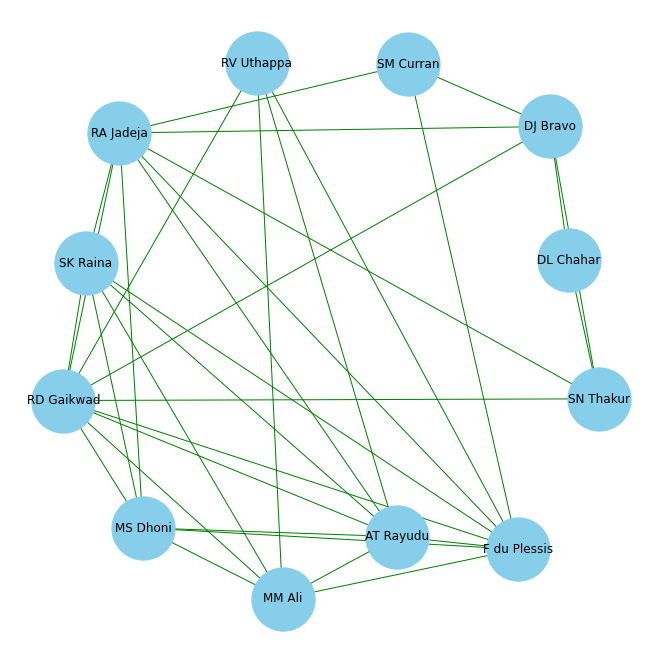

In [204]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_UnDirected, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_UnDirected, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_UnDirected.edges(), edge_color='g')
plt.savefig(f"Graphs/{team_name}/{team_name}_UnDirected.png", format="PNG")
plt.show()

In [205]:
import networkx as nx
# construct graph
G_Directed = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G_Directed, 'performance').items())

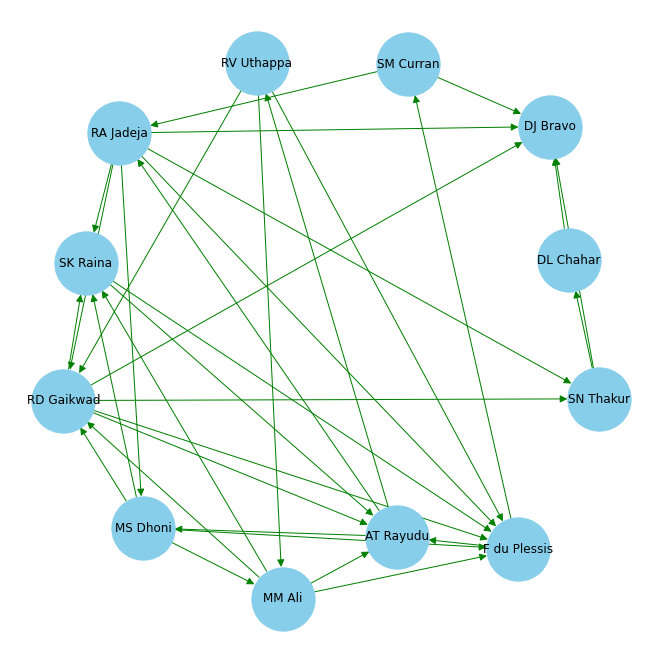

In [206]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_Directed, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_Directed, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_Directed.edges(), edge_color='g', arrowsize=15)
plt.savefig(f"Graphs/{team_name}/{team_name}_Directed.png", format="PNG")
plt.show()

# Degree of each node of graph

In [207]:
print("Degree of above Network:")
print(G_Directed.degree(),"\n")
deg=G_Directed.degree()

Degree of above Network:
[('RD Gaikwad', 9), ('F du Plessis', 8), ('MM Ali', 6), ('SK Raina', 6), ('AT Rayudu', 7), ('RA Jadeja', 8), ('MS Dhoni', 6), ('SM Curran', 3), ('DJ Bravo', 5), ('SN Thakur', 4), ('DL Chahar', 2), ('RV Uthappa', 4)] 



In [208]:
min_name,min_degree=min(deg,key=lambda deg:deg[1])
s=min_name+": "+str(min_degree)
print(s)
final_compare_df['Min_degree_name']=[min_name]
final_compare_df['Min_degree']=[min_degree]

max_name,max_degree=max(deg,key=lambda deg:deg[1])
s=max_name+": "+str(max_degree)
# print(s)
# final_compare_df['Max_Indegree_name']=[s]
print(s)
final_compare_df['Max_degree_name']=[max_name]
final_compare_df['Max_degree']=[max_degree]


DL Chahar: 2
RD Gaikwad: 9


# In-degree of each node of the graph

In [209]:
print(G_Directed.in_degree())


[('RD Gaikwad', 4), ('F du Plessis', 6), ('MM Ali', 2), ('SK Raina', 4), ('AT Rayudu', 4), ('RA Jadeja', 2), ('MS Dhoni', 2), ('SM Curran', 1), ('DJ Bravo', 5), ('SN Thakur', 2), ('DL Chahar', 1), ('RV Uthappa', 1)]


In [210]:
indeg=G_Directed.in_degree()
min_name,min_indegree=min(indeg,key=lambda indeg:indeg[1])
s=min_name+": "+str(min_indegree)
# print(s)
final_compare_df['Min_Indegree_name']=[s]

In [211]:

max_name,max_indegree=max(indeg,key=lambda indeg:indeg[1])
s=max_name+": "+str(max_indegree)
# print(s)
final_compare_df['Max_Indegree_name']=[s]



# Out-degree of each node of the graph

In [212]:
print(G_Directed.out_degree())

[('RD Gaikwad', 5), ('F du Plessis', 2), ('MM Ali', 4), ('SK Raina', 2), ('AT Rayudu', 3), ('RA Jadeja', 6), ('MS Dhoni', 4), ('SM Curran', 2), ('DJ Bravo', 0), ('SN Thakur', 2), ('DL Chahar', 1), ('RV Uthappa', 3)]


In [213]:
Out=G_Directed.out_degree()
min_name,min_outdegree=min(Out,key=lambda Out:Out[1])
s=min_name+": "+str(min_outdegree)
# print(s)
final_compare_df['Min_Outdegree_name']=[s]

In [214]:
max_name,max_outdegree=max(Out,key=lambda Out:Out[1])
s=max_name+": "+str(max_outdegree)
# print(s)
final_compare_df['Max_Outdegree_name']=[s]



# Normalized Degree Centrality

In [215]:
print(nx.degree_centrality(G_Directed))

{'RD Gaikwad': 0.8181818181818182, 'F du Plessis': 0.7272727272727273, 'MM Ali': 0.5454545454545454, 'SK Raina': 0.5454545454545454, 'AT Rayudu': 0.6363636363636364, 'RA Jadeja': 0.7272727272727273, 'MS Dhoni': 0.5454545454545454, 'SM Curran': 0.2727272727272727, 'DJ Bravo': 0.4545454545454546, 'SN Thakur': 0.36363636363636365, 'DL Chahar': 0.18181818181818182, 'RV Uthappa': 0.36363636363636365}


# Closeness Centrality

In [216]:
print(nx.closeness_centrality(G_Directed))

{'RD Gaikwad': 0.41558441558441556, 'F du Plessis': 0.5818181818181819, 'MM Ali': 0.3232323232323232, 'SK Raina': 0.4475524475524476, 'AT Rayudu': 0.4475524475524476, 'RA Jadeja': 0.36363636363636365, 'MS Dhoni': 0.3878787878787879, 'SM Curran': 0.36363636363636365, 'DJ Bravo': 0.6111111111111112, 'SN Thakur': 0.4090909090909091, 'DL Chahar': 0.3246753246753247, 'RV Uthappa': 0.3062200956937799}


# Betweenness Centrality 

In [217]:
print(nx.betweenness_centrality(G_Directed,normalized=True))

{'RD Gaikwad': 0.11318181818181818, 'F du Plessis': 0.09909090909090908, 'MM Ali': 0.019242424242424238, 'SK Raina': 0.018484848484848482, 'AT Rayudu': 0.23606060606060603, 'RA Jadeja': 0.17727272727272728, 'MS Dhoni': 0.05833333333333333, 'SM Curran': 0.03666666666666667, 'DJ Bravo': 0.0, 'SN Thakur': 0.08181818181818182, 'DL Chahar': 0.0, 'RV Uthappa': 0.03257575757575757}


# Reciprocity

In [218]:
print(nx.reciprocity(G_Directed))

0.0


# Density

In [219]:
print(nx.density(G_Directed))



0.25757575757575757


In [220]:
final_compare_df['Density']=[nx.density(G_Directed)]


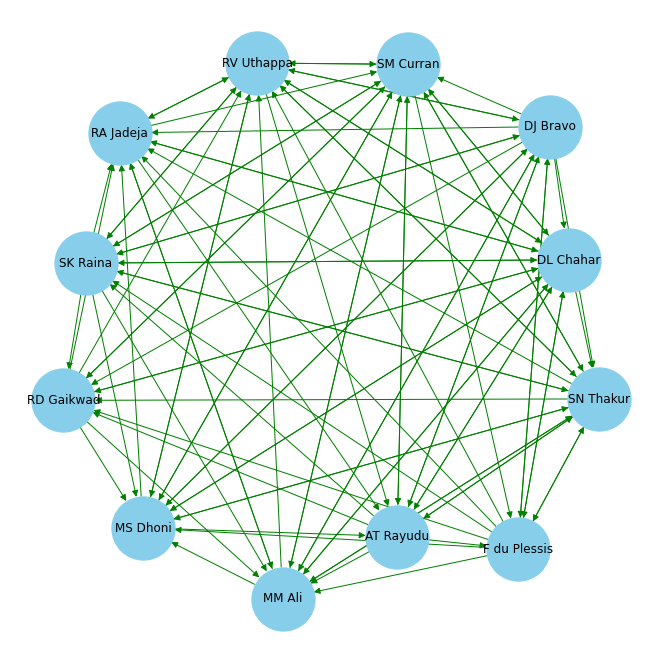

In [221]:
G_C = nx.complement(G_Directed)
# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_C, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_C, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_C.edges(), edge_color='g', arrowsize=13)
plt.savefig(f"Graphs/{team_name}/{team_name}_Complement.png", format="PNG")
plt.show()

# Shortest path lengths between all pairs

In [222]:
shortest_paths=nx.all_pairs_shortest_path_length(G_Directed)
shortest_paths_list=list(shortest_paths)
print(shortest_paths_list)

[('RD Gaikwad', {'RD Gaikwad': 0, 'AT Rayudu': 1, 'F du Plessis': 1, 'SN Thakur': 1, 'SK Raina': 1, 'DJ Bravo': 1, 'SM Curran': 2, 'RA Jadeja': 2, 'DL Chahar': 2, 'MS Dhoni': 2, 'RV Uthappa': 2, 'MM Ali': 3}), ('F du Plessis', {'F du Plessis': 0, 'AT Rayudu': 1, 'SM Curran': 1, 'RA Jadeja': 2, 'MS Dhoni': 2, 'RV Uthappa': 2, 'DJ Bravo': 2, 'RD Gaikwad': 3, 'SN Thakur': 3, 'SK Raina': 3, 'MM Ali': 3, 'DL Chahar': 4}), ('MM Ali', {'MM Ali': 0, 'RD Gaikwad': 1, 'SK Raina': 1, 'AT Rayudu': 1, 'F du Plessis': 1, 'SM Curran': 2, 'RA Jadeja': 2, 'SN Thakur': 2, 'MS Dhoni': 2, 'DJ Bravo': 2, 'RV Uthappa': 2, 'DL Chahar': 3}), ('SK Raina', {'SK Raina': 0, 'AT Rayudu': 1, 'F du Plessis': 1, 'SM Curran': 2, 'RA Jadeja': 2, 'MS Dhoni': 2, 'RV Uthappa': 2, 'RD Gaikwad': 3, 'SN Thakur': 3, 'DJ Bravo': 3, 'MM Ali': 3, 'DL Chahar': 4}), ('AT Rayudu', {'AT Rayudu': 0, 'RA Jadeja': 1, 'MS Dhoni': 1, 'RV Uthappa': 1, 'F du Plessis': 2, 'RD Gaikwad': 2, 'SN Thakur': 2, 'SK Raina': 2, 'DJ Bravo': 2, 'MM Al

# Diameter of the Complemented Undirected Network

In [223]:
print(nx.diameter(G_UnDirected))

3


In [224]:
final_compare_df['Diameter']=[nx.diameter(G_UnDirected)]


# Eccentricty of all the nodes of the Undirected Network


In [225]:
dict_ecc=dict(nx.eccentricity(G_UnDirected))
print(dict_ecc)

{'RD Gaikwad': 2, 'F du Plessis': 3, 'MM Ali': 3, 'SK Raina': 3, 'AT Rayudu': 3, 'RA Jadeja': 2, 'MS Dhoni': 3, 'SM Curran': 2, 'DJ Bravo': 2, 'SN Thakur': 2, 'DL Chahar': 3, 'RV Uthappa': 3}


# Implementing the Girvan-Newman Algorithm for Community Detection in Python

In [226]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg


# find communities in the graph
c = girvan_newman(G_UnDirected.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

print(node_groups)  #printing the communities in the form of lists

[['AT Rayudu', 'F du Plessis', 'SM Curran', 'RD Gaikwad', 'RA Jadeja', 'SK Raina', 'MS Dhoni', 'RV Uthappa', 'MM Ali'], ['DJ Bravo', 'DL Chahar', 'SN Thakur']]


# Plotting the communities

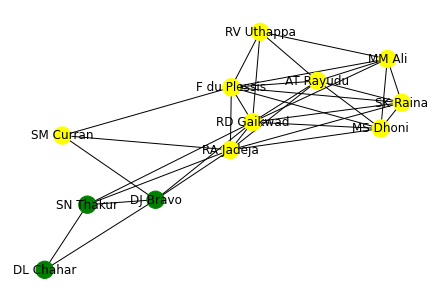

In [227]:
color_map = []
for node in G_UnDirected:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('green') 

nx.draw(G_UnDirected, node_color=color_map, with_labels=True)
plt.savefig(f"Graphs/{team_name}/{team_name}_Community.png", format="PNG")
plt.show()

# Clustering 

In [228]:
import networkx as nx

# returns a Dictionary with clustering value of each node
print(nx.clustering(G_UnDirected))
 
# This returns clustering value of specified node
print("\nMS Dhoni:",nx.clustering(G_UnDirected, 'MS Dhoni'))

{'RD Gaikwad': 0.5555555555555556, 'F du Plessis': 0.6428571428571429, 'MM Ali': 0.8666666666666667, 'SK Raina': 0.9333333333333333, 'AT Rayudu': 0.8095238095238095, 'RA Jadeja': 0.5357142857142857, 'MS Dhoni': 0.9333333333333333, 'SM Curran': 0.6666666666666666, 'DJ Bravo': 0.5, 'SN Thakur': 0.6666666666666666, 'DL Chahar': 1.0, 'RV Uthappa': 1.0}

MS Dhoni: 0.9333333333333333


# Graph connectivity measures

In [229]:
print(nx.is_connected(G_UnDirected))
 
# returns number of different connected components
print(nx.number_connected_components(G_UnDirected))
 
# returns list of nodes in different connected components
print(list(nx.connected_components(G_UnDirected)))
 
# returns list of nodes of component containing given node
print(nx.node_connected_component(G_UnDirected, 'MS Dhoni'))
 
# returns number of nodes to be removed so that Graph becomes disconnected
print(nx.node_connectivity(G_UnDirected))
 
# returns number of edges to be removed so that Graph becomes disconnected
print(nx.edge_connectivity(G_UnDirected))

True
1
[{'AT Rayudu', 'F du Plessis', 'SM Curran', 'RD Gaikwad', 'RA Jadeja', 'DL Chahar', 'SN Thakur', 'SK Raina', 'MS Dhoni', 'DJ Bravo', 'RV Uthappa', 'MM Ali'}]
{'AT Rayudu', 'F du Plessis', 'SM Curran', 'RA Jadeja', 'RD Gaikwad', 'DL Chahar', 'SN Thakur', 'SK Raina', 'MS Dhoni', 'DJ Bravo', 'RV Uthappa', 'MM Ali'}
2
2


# Modularity of the graph

In [230]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G_UnDirected, node_groups))
print(nx_comm.modularity(G_UnDirected, nx_comm.label_propagation_communities(G_UnDirected)))

0.12413494809688573
0.0


In [231]:
final_compare_df['Modularity']= nx_comm.modularity(G_UnDirected, node_groups)


In [232]:
# !pip install --upgrade scipy networkx

# Pagerank

In [233]:
import networkx as nx
pr1 = nx.pagerank(G_UnDirected, 1) # component of vector x = 1
pr2 = nx.pagerank(G_UnDirected, 0.5)  # component of vector x = 0.5
# print(pr1)
s1="Node " +str(max(pr1))+" = "+ str(pr1[max(pr1)])
print(s1)
s2="Node " +str(max(pr2))+" = "+ str(pr2[max(pr2)])
# print(pr2)
print(s2)


Node SN Thakur = 0.05882564184510173
Node SN Thakur = 0.07814028102049739


In [234]:
final_compare_df['Page Rank(x=1)']=s1
final_compare_df['Page Rank(x=0.5)']=s2
print(final_compare_df.T)

                                                       0
Min_degree_name                                DL Chahar
Min_degree                                             2
Max_degree_name                               RD Gaikwad
Max_degree                                             9
Min_Indegree_name                           SM Curran: 1
Max_Indegree_name                        F du Plessis: 6
Min_Outdegree_name                           DJ Bravo: 0
Max_Outdegree_name                          RA Jadeja: 6
Density                                         0.257576
Diameter                                               3
Modularity                                      0.124135
Page Rank(x=1)      Node SN Thakur = 0.05882564184510173
Page Rank(x=0.5)    Node SN Thakur = 0.07814028102049739


In [235]:

final_compare_df.to_csv(f"Graphs/{team_name}/{team_name}.csv")